In [41]:

# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [42]:
# Loading the dataset
df = pd.read_csv('diabetes.csv')

In [43]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
3498,2,109,92,0,0,42.7,0.845,54,0
3499,1,95,66,13,38,19.6,0.334,25,0
3500,4,146,85,27,100,28.9,0.189,27,0
3501,2,100,66,20,90,32.9,0.867,28,1


In [44]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [45]:
df.shape

(3503, 9)

In [46]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               3503 non-null   int64  
 1   Glucose                   3503 non-null   int64  
 2   BloodPressure             3503 non-null   int64  
 3   SkinThickness             3503 non-null   int64  
 4   Insulin                   3503 non-null   int64  
 5   BMI                       3503 non-null   float64
 6   DiabetesPedigreeFunction  3503 non-null   float64
 7   Age                       3503 non-null   int64  
 8   Outcome                   3503 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 246.4 KB
None


In [48]:
print(df.describe().T)

                           count        mean         std     min     25%  \
Pregnancies               3503.0    3.759349    3.323769   0.000   1.000   
Glucose                   3503.0  120.823294   32.208184   0.000  99.000   
BloodPressure             3503.0   69.022838   19.291670   0.000  64.000   
SkinThickness             3503.0   20.734799   16.049010   0.000   0.000   
Insulin                   3503.0   79.656580  112.567244   0.000   0.000   
BMI                       3503.0   32.043848    8.082460   0.000  27.300   
DiabetesPedigreeFunction  3503.0    0.474007    0.329446   0.078   0.245   
Age                       3503.0   33.170996   11.772624  21.000  24.000   
Outcome                   3503.0    0.342278    0.474540   0.000   0.000   

                              50%      75%     max  
Pregnancies                 3.000    6.000   17.00  
Glucose                   117.000  141.000  199.00  
BloodPressure              72.000   80.000  122.00  
SkinThickness              

In [49]:
# Returns true for a column having null values, else false
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [50]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6      148             72             35        0  33.6  0.627   
1            1       85             66             29        0  26.6  0.351   
2            8      183             64              0        0  23.3  0.672   
3            1       89             66             23       94  28.1  0.167   
4            0      137             40             35      168  43.1  2.288   

   Age  Outcome  
0   50        1  
1   31        0  
2   32        1  
3   21        0  
4   33        1  


In [11]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(df_copy.isnull().sum())

Pregnancies         0
Glucose            24
BloodPressure     161
SkinThickness    1018
Insulin          1690
BMI                52
DPF                 0
Age                 0
Outcome             0
dtype: int64


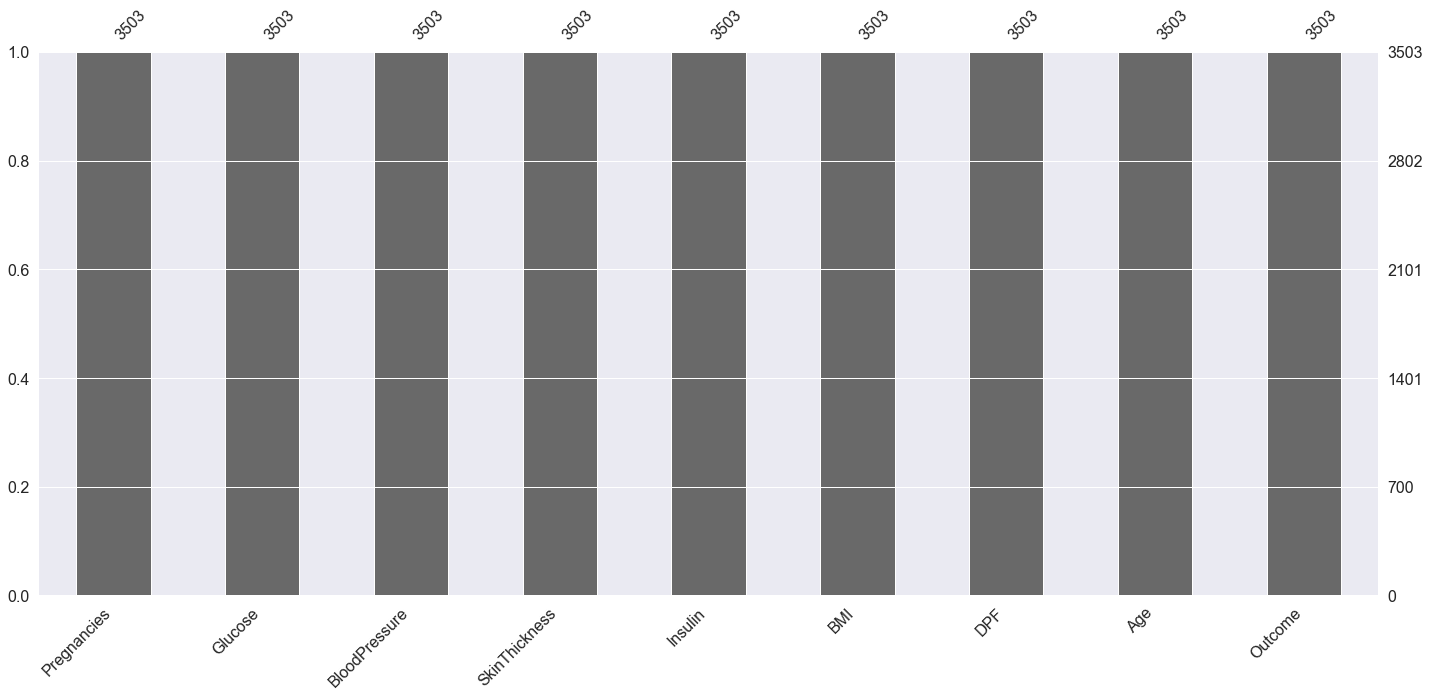

In [51]:
p = msno.bar(df_copy)

In [52]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
3498,2,109.0,92.0,29.0,125.0,42.7,0.845,54,0
3499,1,95.0,66.0,13.0,38.0,19.6,0.334,25,0
3500,4,146.0,85.0,27.0,100.0,28.9,0.189,27,0
3501,2,100.0,66.0,20.0,90.0,32.9,0.867,28,1


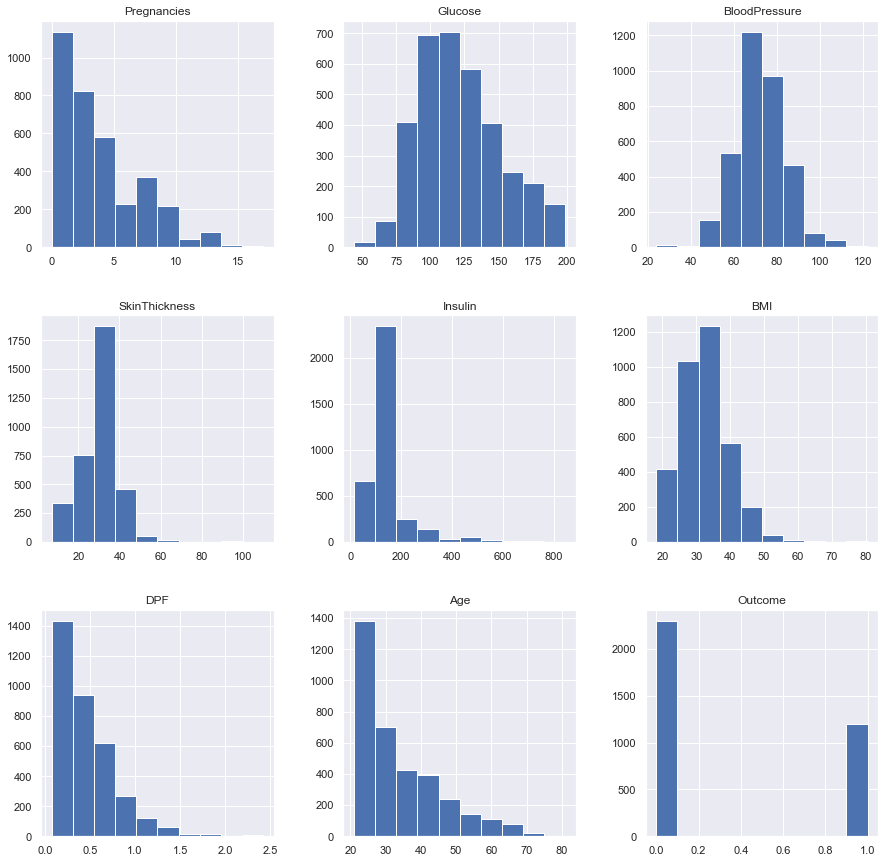

In [53]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))
plt.show()



In [54]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [55]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
3498,2,109.0,92.0,29.0,125.0,42.7,0.845,54,0
3499,1,95.0,66.0,13.0,38.0,19.6,0.334,25,0
3500,4,146.0,85.0,27.0,100.0,28.9,0.189,27,0
3501,2,100.0,66.0,20.0,90.0,32.9,0.867,28,1


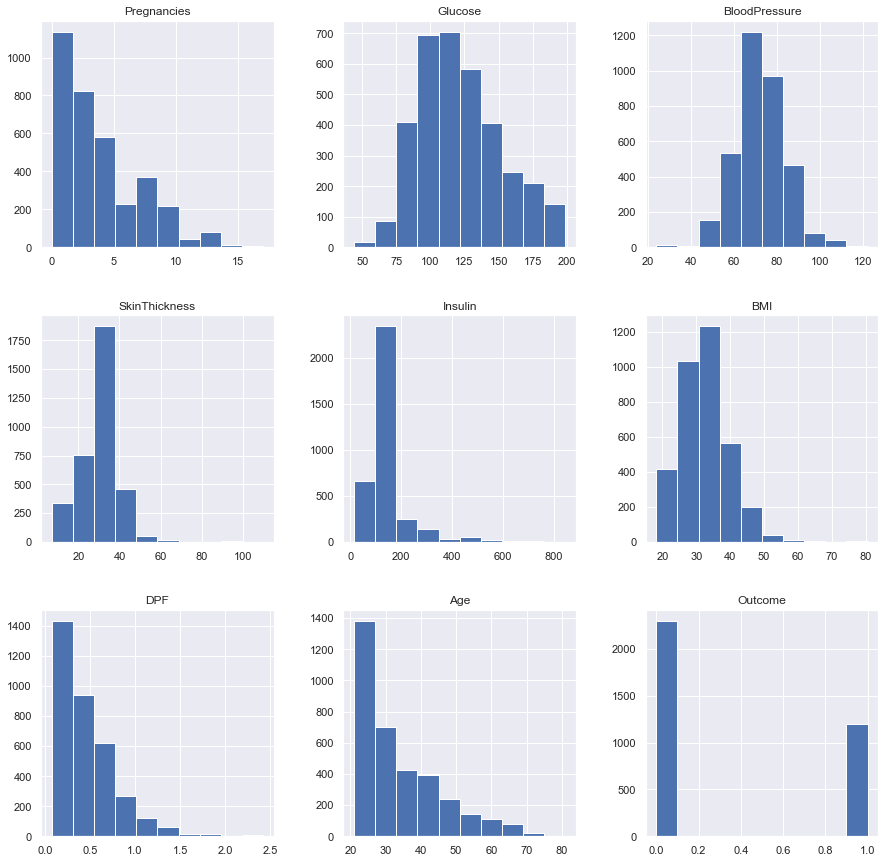

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64


In [56]:
# Plotting histogram of dataset after replacing NaN values
p = df_copy.hist(figsize=(15,15))
plt.show()


#sns.pairplot(df_copy,hue = 'Outcome')
print(df_copy.isnull().sum())


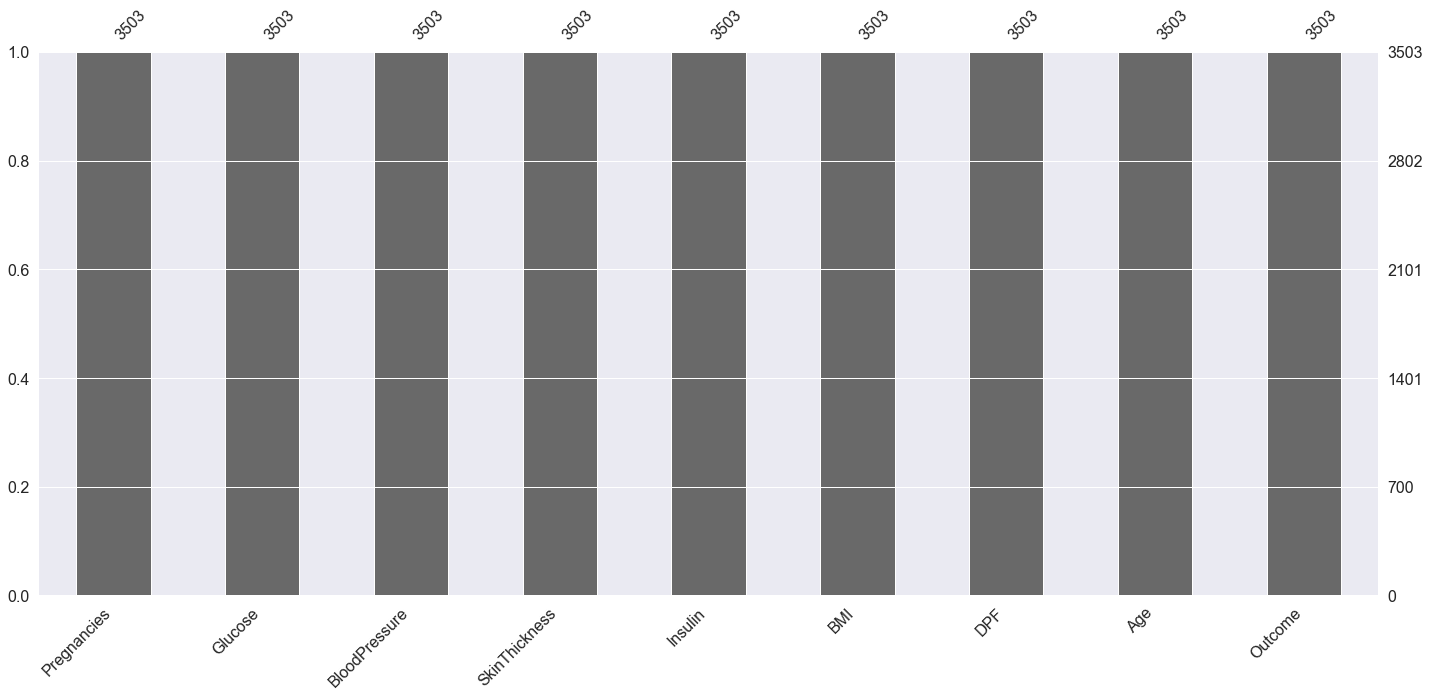

In [57]:
p = msno.bar(df_copy)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

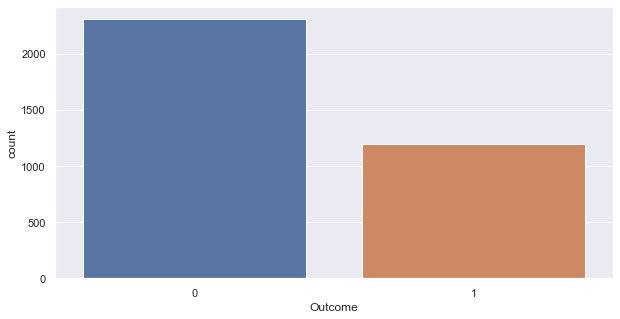

In [58]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,5))
sns.countplot(x='Outcome', data=df)


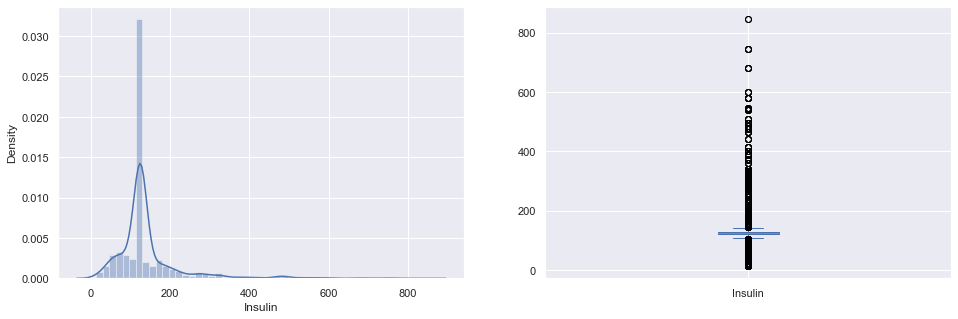

In [59]:
plt.subplot(121), sns.distplot(df_copy['Insulin'])
plt.subplot(122), df_copy['Insulin'].plot.box(figsize=(16,5))
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)


In [22]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [23]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[744   4]
 [  4 404]]


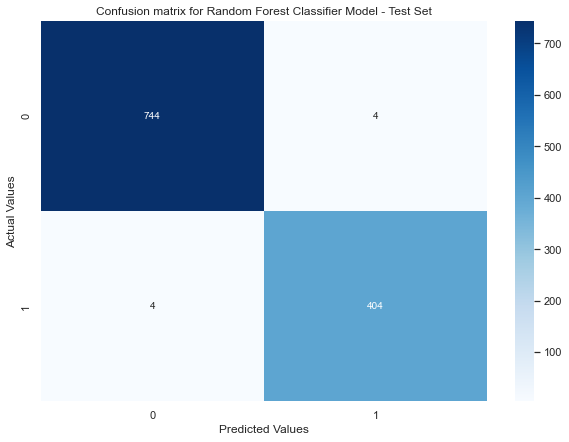

In [24]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


In [25]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))


Accuracy on test set: 99.31%


In [26]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       748
           1       0.99      0.99      0.99       408

    accuracy                           0.99      1156
   macro avg       0.99      0.99      0.99      1156
weighted avg       0.99      0.99      0.99      1156



In [27]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)


[[1556    0]
 [   0  791]]


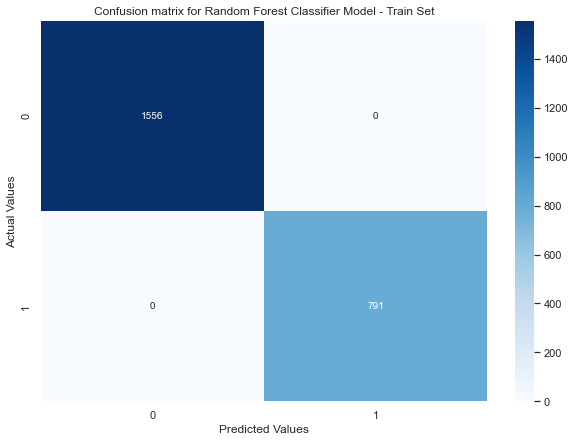

In [28]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


In [29]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 100.0%


In [30]:
# Classification Report
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       1.00      1.00      1.00       791

    accuracy                           1.00      2347
   macro avg       1.00      1.00      1.00      2347
weighted avg       1.00      1.00      1.00      2347



In [31]:
import pickle

In [32]:
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(classifier)

In [33]:
# Then we will be loading that saved model
classifier_from_pickle = pickle.loads(saved_model)


In [34]:
# Then we will be loading that saved model
classifier_from_pickle = pickle.loads(saved_model)


In [35]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [36]:
filename='trained_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [37]:
#loading the saved model

In [38]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [40]:
a=int(input("enter no of pregnancies="))
b=float(input("Enter glucose level="))
c=float(input("Enter blood pressure  level="))
st=float(input("Enter skinthickness level="))
i=float(input("Enter insulin level="))
bmi=float(input("Enter bmi level="))
d=float(input("enter dpf="))
age=int(input("enter age="))
p=loaded_model.predict([[a,b,c,st,i,bmi,d,age]])
if p==0:
    print("great,you dont have diabetes")
else:
    print("you have diabetes, please consult a doctor")

enter no of pregnancies=8
Enter glucose level=183
Enter blood pressure  level=64
Enter skinthickness level=29
Enter insulin level=125
Enter bmi level=23.3
enter dpf=0.672
enter age=32
you have diabetes, please consult a doctor
